<a href="https://colab.research.google.com/github/ps11061601/CCProject/blob/master/CloudProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [97]:
#Reading the csv file into a pandas dataframe
train = pd.read_csv("AB_NYC_2019.csv")
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# New Section

In [98]:
train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [99]:
train.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [0]:
train['last_review']=pd.to_datetime(train['last_review'])
train.last_review.fillna(max(train.last_review),inplace=True)
train.reviews_per_month.fillna(0,inplace=True)
col =train[['id','name']]
train=train.drop(columns=col)

In [0]:
train=train[train.price>0]
train=train[train.availability_365>0]

In [0]:
# Setting the target variable and independent variable
X=['latitude','longitude','minimum_nights','number_of_reviews','availability_365','room_type','neighbourhood_group','neighbourhood']
y='price'

In [103]:
X_train = train[X]
X_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,availability_365,room_type,neighbourhood_group,neighbourhood
0,40.64749,-73.97237,1,9,365,Private room,Brooklyn,Kensington
1,40.75362,-73.98377,1,45,355,Entire home/apt,Manhattan,Midtown
2,40.80902,-73.94190,3,0,365,Private room,Manhattan,Harlem
3,40.68514,-73.95976,1,270,194,Entire home/apt,Brooklyn,Clinton Hill
5,40.74767,-73.97500,3,74,129,Entire home/apt,Manhattan,Murray Hill


In [104]:
y_train = train[y]
y_train.head()

0    149
1    225
2    150
3     89
5    200
Name: price, dtype: int64

In [0]:
# encoding the categorical data for making data suitable for machine to learn
X=pd.get_dummies(X_train,prefix_sep='_',drop_first=True)

In [106]:
X.shape

(31354, 228)

In [0]:
##Prices are not normally distributed as well as there is alot of noise. Logarithmic conversion of data with huge variance can be normalised by logarithmic algorithm.
y=np.log10(y_train)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [0]:
# importing important LinearRegression ML models
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

In [110]:
# Evaluation of model

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

RMSE: 175346.66
R2 score train: 0.56
R2 score test: -323240318617.87


In [0]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)
y_predict=br.predict(X_test)

In [112]:
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2)*100)
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

RMSE: 175346.66
R2 score train: 56.00000000000001
R2 score test: -323240318617.87


In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                                            # Fit label encoder
le.fit(train['neighbourhood_group'])
train['neighbourhood_group']=le.transform(train['neighbourhood_group'])    # Transform labels to normalized encoding.

le = LabelEncoder()
le.fit(train['neighbourhood'])
train['neighbourhood']=le.transform(train['neighbourhood'])

le =LabelEncoder()
le.fit(train['room_type'])
train['room_type']=le.transform(train['room_type'])

train.sort_values(by='price',ascending=True,inplace=True)

train.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22835,97001292,Maria,3,104,40.69085,-73.79916,0,10,1,43,2019-06-12,1.68,1,252
31407,91034542,Maureen,2,111,40.74408,-73.97803,1,10,5,42,2019-06-30,2.87,1,2
32810,167570251,Rachel,1,188,40.66242,-73.99464,0,10,1,14,2018-10-28,1.06,1,4
33225,197169969,Maria,3,104,40.68939,-73.79886,0,10,2,22,2019-07-06,1.76,1,332
35386,47516406,Arthur,3,215,40.69139,-73.86086,1,10,7,4,2018-10-08,0.41,2,180


In [114]:
#LinearRegression
lm = LinearRegression()

X = train[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = np.log10(train['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
from sklearn.metrics import mean_absolute_error
y_predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))


        Mean Squared Error: 0.23559594585035462
        R2 Score: 41.13846713448027
        Mean Absolute Error: 0.1752493261889977
     


In [116]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

Reg_tree=DecisionTreeRegressor(criterion='mse',max_depth=3,random_state=0)
Reg_tree=Reg_tree.fit(X_train,y_train)

y_predicts=Reg_tree.predict(X_test)
print("median absolute deviation (MAD): ",np.mean(abs(np.multiply(np.array(y_test.T-y_predicts),np.array(1/y_test)))))
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))

median absolute deviation (MAD):  0.07891993758856267

        Mean Squared Error: 0.22321601940282695
        R2 Score: 47.1619647368602
        Mean Absolute Error: 0.16371095833232624
     


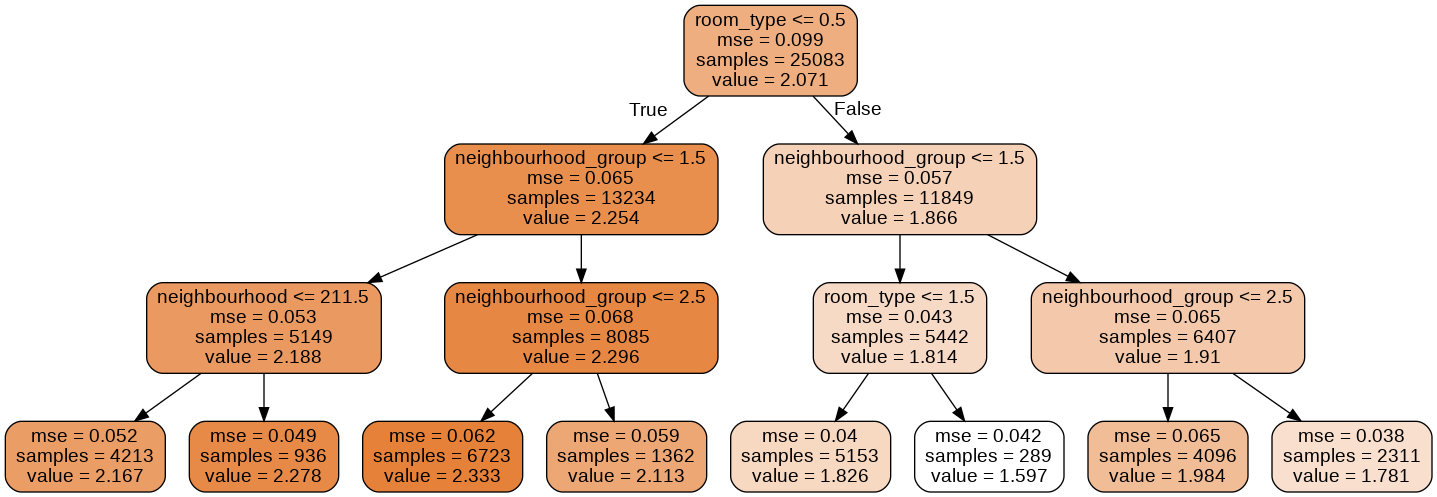

In [117]:
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage
from sklearn.tree import export_graphviz
with open("tree1.dot", 'w') as f:
     f = export_graphviz(Reg_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = ['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'],
                              rounded = True,
                              filled= True )
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

In [118]:
y=np.log10(train.price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
Reg_tree.fit(X_train,y_train)
y_predicts=Reg_tree.predict(X_test)
from sklearn.metrics import r2_score
print('r2 score:',r2_score(y_test,y_predicts)*100,'%')

r2 score: 47.1619647368602 %


In [0]:
X = train[['neighbourhood_group','neighbourhood','room_type','number_of_reviews','reviews_per_month','availability_365']]
y=np.log10(train.price)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
Reg_tree.fit(X_train,y_train)
y_predicts=Reg_tree.predict(X_test)
from sklearn.metrics import r2_score
print('r2 score:',r2_score(y_test,y_predicts)*100,'%')

r2 score: 47.16196473686017 %


In [122]:
lm.fit(X_train,y_train)
y_predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))


        Mean Squared Error: 0.23578065291490327
        R2 Score: 41.0461361498634
        Mean Absolute Error: 0.17640746161192752
     


In [0]:
#Dropping irrelevant columns
# cols =  train[['id','name','host_id','host_name','last_review','reviews_per_month','calculated_host_listings_count','neighbourhood']]
# train = train.drop(columns=cols)
# train.head()

In [0]:
# #Checking for missing values in the reamaining columns
# train.isnull().sum()

In [0]:
#Saving the data into a new file
# train.to_csv('preprocessed_1.csv')

In [0]:
#Dividing the dataset into target and predicting variables
# y= train[['price']]
# X = train.drop(columns='price')
# X.head()

In [0]:
# One hot encoding the catagorical variables
# X = pd.get_dummies(X)
# X.columns = X.columns.str.replace(' ', '_')
# X.head()

In [0]:
 # Splitting the dataset into training and testing sets
#  from sklearn.model_selection import train_test_split
#  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# Scaling the training and testing data
# scaler = StandardScaler(copy= True, with_mean= True, with_std= True)
# X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
# X_train_scaled.head()

In [0]:

# X_test_scaled = scaler.fit_transform(X_test)
# X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)
# X_test_scaled.head()

In [0]:
# Linear model
# linear_model = LinearRegression()
# linear_model.fit(X_train,y_train)

In [0]:
# Checking the accuracy of the linear model by printing the root mean squared errors 
# train_predict = linear_model.predict(X_train)
# print('RMSE train : ',np.sqrt(mean_squared_error(train_predict,y_train)))

# test_predict = linear_model.predict(X_test)
# print('RMSE test : ', np.sqrt(mean_squared_error(test_predict,y_test)))

In [0]:
# train_predict

In [0]:
# test_predict

In [0]:
# train1 = pd.get_dummies(train)
# train1.columns = train1.columns.str.replace(' ', '_')
# train1.head()


In [123]:
actual_sample = train.head(1)
actual_sample


,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22835,97001292,Maria,3,104,40.69085,-73.79916,0,10,1,43,2019-06-12,1.68,1,252


In [125]:
adhoc_predict = actual_sample[['neighbourhood_group','neighbourhood','room_type','number_of_reviews','reviews_per_month','availability_365']]
adhoc_predict.head()

,neighbourhood_group,neighbourhood,room_type,number_of_reviews,reviews_per_month,availability_365
22835,3,104,0,43,1.68,252


In [126]:
json_payload = adhoc_predict.to_json()
json_payload

'{"neighbourhood_group":{"22835":3},"neighbourhood":{"22835":104},"room_type":{"22835":0},"number_of_reviews":{"22835":43},"reviews_per_month":{"22835":1.68},"availability_365":{"22835":252}}'

In [127]:
scaler = StandardScaler().fit(adhoc_predict)
scaled_adhoc_predict = scaler.transform(adhoc_predict)
scaled_adhoc_predict

array([[0., 0., 0., 0., 0., 0.]])

In [128]:
list(lm.predict(scaled_adhoc_predict))

[2.1619120686603903]

In [0]:
from sklearn.externals import joblib

In [130]:
joblib.dump(lm, 'ny_airbnb_prediction.joblib')

['ny_airbnb_prediction.joblib']

In [131]:
!ls -l

total 9696
-rw-r--r-- 1 root root 7077973 Apr 24 20:44 AB_NYC_2019.csv
-rw-r--r-- 1 root root     661 Apr 25 01:27 ny_airbnb_prediction.joblib
-rw-r--r-- 1 root root 2562212 Apr 24 21:07 preprocessed_1.csv
drwxr-xr-x 1 root root    4096 Apr  3 16:24 sample_data
-rw-r--r-- 1 root root  134845 Apr 25 01:25 sample-out.png
-rw-r--r-- 1 root root    1710 Apr 25 01:25 tree1.dot
-rw-r--r-- 1 root root  135077 Apr 25 01:25 tree1.png


In [0]:
clf = joblib.load('ny_airbnb_prediction.joblib')

In [133]:
actual_sample2 = train.head(5)
actual_sample2

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22835,97001292,Maria,3,104,40.69085,-73.79916,0,10,1,43,2019-06-12,1.68,1,252
31407,91034542,Maureen,2,111,40.74408,-73.97803,1,10,5,42,2019-06-30,2.87,1,2
32810,167570251,Rachel,1,188,40.66242,-73.99464,0,10,1,14,2018-10-28,1.06,1,4
33225,197169969,Maria,3,104,40.68939,-73.79886,0,10,2,22,2019-07-06,1.76,1,332
35386,47516406,Arthur,3,215,40.69139,-73.86086,1,10,7,4,2018-10-08,0.41,2,180


In [134]:
adhoc_predict2 = actual_sample[['neighbourhood_group','neighbourhood','room_type','number_of_reviews','reviews_per_month','availability_365']]
adhoc_predict2.head()

,neighbourhood_group,neighbourhood,room_type,number_of_reviews,reviews_per_month,availability_365
22835,3,104,0,43,1.68,252


In [135]:
scaler = StandardScaler().fit(adhoc_predict2)
scaled_adhoc_predict2 = scaler.transform(adhoc_predict2)
scaled_adhoc_predict2

array([[0., 0., 0., 0., 0., 0.]])

In [136]:
# Use pickle loaded model
list(clf.predict(scaled_adhoc_predict2))

[2.1619120686603903]

In [137]:
#Gradient Boosting
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0)
clf.fit(X_train,y_train)
scores = cross_val_score(clf, X_test, y_test, cv=5)
scores.mean()

0.5272124440419665

In [138]:
y_predict = clf.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predict)),
        r2_score(y_test,y_predict) * 100,
        mean_absolute_error(y_test,y_predict)
        ))


        Mean Squared Error: 0.21075527121725496
        R2 Score: 52.89653741811912
        Mean Absolute Error: 0.15464038590998772
     
